# CS559: Homework #2
Assignment #2: Due on 3/12/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [2]:
df = pd.read_csv('HW2_Q2_0.csv')

In [3]:
df.columns = ['X', 'Y']

In [4]:
df.head()

,X,Y
0,-0.169793,1.073745
1,1.128729,-2.395042
2,0.122506,-0.973069
3,-0.409200,0.129649
4,0.476229,-0.048147


In [5]:
df.shape

(824, 2)

1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

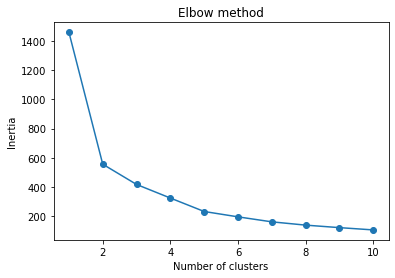

,Inertia
n = 1,1461.526463
n = 2,555.212132
n = 3,416.020497
n = 4,322.692298
n = 5,230.300676
n = 6,193.543724
n = 7,159.255425
n = 8,136.683436
n = 9,119.477217
n = 10,103.808249


In [7]:
plot_inertia(kmeans,df, range(1,11))

In [8]:
#The K value of k = 3 is appropriate here as it is the point after the steepest slope.

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

In [9]:
kmeans.set_params(n_clusters = 3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.fit_predict(df)

In [11]:
labels.shape

(824,)

In [12]:
centers = kmeans.cluster_centers_

In [13]:
filtered0 = df[labels==0]
filtered1 = df[labels==1]
filtered2 = df[labels==2]

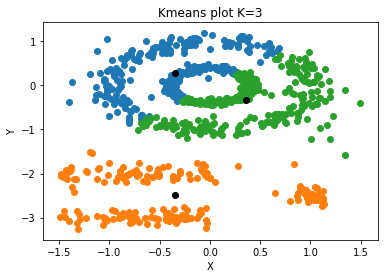

In [14]:
plt.scatter(filtered0.iloc[:,0], filtered0.iloc[:,1])
plt.scatter(filtered1.iloc[:,0],filtered1.iloc[:,1])
plt.scatter(filtered2.iloc[:,0],filtered2.iloc[:,1])
plt.scatter(centers[:,0],centers[:,1], color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans plot K=3')
plt.show()

In [15]:
#The K value of 3 seems to be appropriate because it separates the chart into distinct areas with minimal overlap 


1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [16]:
#We will need several helper functions to make my_kmeans
#Make distance function
#Assign initial centroids at random
#assign each observation to a cluster 
#calculate new cluster centeres
#reassign clusters based on new centroids
#repeat

#1 make euclidean distance 
def euclidean_distance(x1,x2):
    return np.linalg.norm(x1-x2)
    


In [17]:
#2 assign three random points as centroid
points = random.sample(range(0,len(df)),3)

In [18]:
#get xy coordinated of these points
centroids = []
for i in points:
    centroids.append(df.iloc[i])

In [19]:
#These are out initial centroids
centroids = np.array(centroids)
centroids

array([[ 0.26922445,  0.23535121],
       [-0.44490254, -0.93138363],
       [ 0.27159465, -0.25583208]])

In [20]:
#3 assign each observation to cluster by calculating distance to each of the three centroids
#then assign to group with smallest distance 
#findClosestCentroid
def makeClusters(centroid, df):
    assigned_cluster = []
    #iter through df
    for i in range(len(df)):
        dist = []
        for j in centroid:
            #find distance
            dist.append(euclidean_distance(np.array(df.iloc[i]),j))
        #find smallest distance of three distances
        assigned_cluster.append(np.argmin(dist))
        #print('dist: ', np.argmin(dist))
    return assigned_cluster
        


In [21]:
assigned_clusters = makeClusters(centroids,df)

In [22]:
assigned_clusters = np.array(assigned_clusters)
assigned_clusters

array([0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0,

In [23]:
df0= df[assigned_clusters==0]
df1=df[assigned_clusters==1]
df2 =df[assigned_clusters==2]

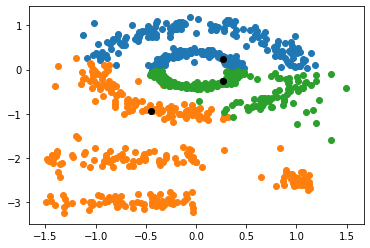

In [24]:
#Plot clusters with randomly generated centroids
plt.scatter(df0['X'],df0['Y'])
plt.scatter(df1['X'],df1['Y'])
plt.scatter(df2['X'],df2['Y'])
plt.scatter(centroids[0][0], centroids[0][1], c='black')
plt.scatter(centroids[1][0], centroids[1][1], c='black')
plt.scatter(centroids[2][0], centroids[2][1], c='black')
plt.show()

In [25]:
len(assigned_clusters)

824

In [69]:
#4 find new centroids. New centroid is the average of the values in a cluster


def findNewCentroid(df, clusterID, n_clusters):
    new_centroid=[]
    for i in range(0,n_clusters):
        new_centroid.append(np.mean(df[clusterID==i]))
    return new_centroid

In [81]:
new_centroids = findNewCentroid(df, assigned_clusters,3)
new_centroids

[X        0.035481
 Y        0.449092
 Class    0.570470
 dtype: float64, X       -0.423568
 Y       -1.807290
 Class    1.016502
 dtype: float64, X        0.256839
 Y       -0.362485
 Class    1.605381
 dtype: float64]

In [28]:
# Make new clusters
new_clusters = makeClusters(new_centroids, df)

In [29]:
new_clusters = np.array(new_clusters)

In [30]:
df0= df[new_clusters==0]
df1=df[new_clusters==1]
df2 =df[new_clusters==2]

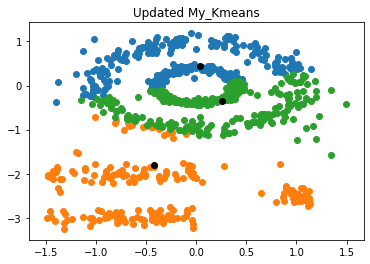

In [31]:
#Make new plot with new clusters assignments and centrouds
plt.scatter(df0['X'],df0['Y'])
plt.scatter(df1['X'],df1['Y'])
plt.scatter(df2['X'],df2['Y'])
plt.scatter(new_centroids[0][0], new_centroids[0][1], c='black')
plt.scatter(new_centroids[1][0], new_centroids[1][1], c='black')
plt.scatter(new_centroids[2][0], new_centroids[2][1], c='black')
plt.title("Updated My_Kmeans")
plt.show()

1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [32]:
#After implementing my own kmeans we had initial centrouds of 
centroids

array([[ 0.26922445,  0.23535121],
       [-0.44490254, -0.93138363],
       [ 0.27159465, -0.25583208]])

In [33]:
#and after one round of kmeans we have the following centrouds
new_centroids

[X    0.035481
 Y    0.449092
 dtype: float64, X   -0.423568
 Y   -1.807290
 dtype: float64, X    0.256839
 Y   -0.362485
 dtype: float64]

1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

In [34]:
df['Class'] = labels

In [35]:
df.head()

,X,Y,Class
0,-0.169793,1.073745,0
1,1.128729,-2.395042,1
2,0.122506,-0.973069,2
3,-0.409200,0.129649,0
4,0.476229,-0.048147,2


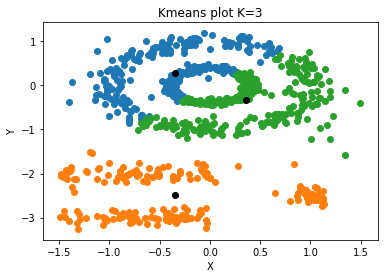

In [36]:
plt.scatter(filtered0.iloc[:,0], filtered0.iloc[:,1])
plt.scatter(filtered1.iloc[:,0],filtered1.iloc[:,1])
plt.scatter(filtered2.iloc[:,0],filtered2.iloc[:,1])
plt.scatter(centers[:,0],centers[:,1], color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans plot K=3')
plt.show()

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

In [37]:
dfQ2 = pd.read_csv('HW2_Q2_1.csv')

In [38]:
dfQ2.columns= ['X', 'Y', 'Class']

In [39]:
dfQ2.head()

,X,Y,Class
0,-0.169793,1.073745,1
1,1.128729,-2.395042,6
2,0.122506,-0.973069,1
3,-0.409200,0.129649,2
4,0.476229,-0.048147,2


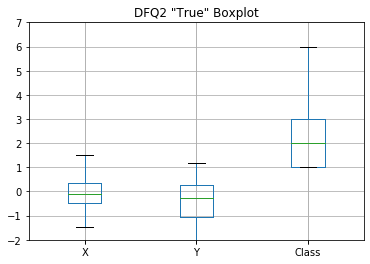

In [40]:
dfQ2.boxplot()
dfQ2.boxplot().set_ylim(-2,7)
plt.title('DFQ2 "True" Boxplot')
plt.show()

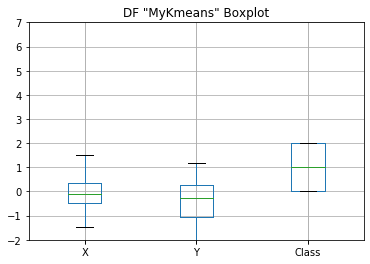

In [41]:
df.boxplot()
df.boxplot().set_ylim(-2,7)
plt.title('DF "MyKmeans" Boxplot')
plt.show()

In [42]:
#Redoing the My_Kmeans with K = 6

In [43]:
df_NoClass  = pd.read_csv('HW2_Q2_0.csv')
df_NoClass.columns = (['X','Y'])

In [44]:
#pick three random points as centroid
points = random.sample(range(0,len(df_NoClass)),6)

In [47]:
#get xy coordinated of these points
centroidsK6 = []
for i in points:
    centroidsK6.append(df_NoClass.iloc[i])


[X   -0.100172
Y   -1.091937
Name: 369, dtype: float64, X   -0.793371
Y   -1.998877
Name: 17, dtype: float64, X    0.122506
Y   -0.973069
Name: 2, dtype: float64, X   -1.039421
Y   -3.007928
Name: 494, dtype: float64, X    0.604858
Y    0.873589
Name: 221, dtype: float64, X    0.362226
Y    0.073827
Name: 558, dtype: float64]


In [48]:
centroidsK6 = np.array(centroidsK6)

In [49]:
centroidsK6

array([[-0.10017183, -1.09193699],
       [-0.79337065, -1.99887718],
       [ 0.12250626, -0.97306902],
       [-1.03942095, -3.00792769],
       [ 0.60485802,  0.87358932],
       [ 0.36222565,  0.07382736]])

In [62]:
new_clustersK6 = makeClusters(centroidsK6,df.iloc[:,:2])
new_clustersK6= np.array(new_clustersK6)

In [63]:
len(new_clustersK6)

824

In [70]:
new_centroidsK6 = findNewCentroid(df.iloc[:,:2], new_clustersK6,6)
new_centroidsK6

[X   -0.583173
 Y   -0.734175
 dtype: float64, X   -0.704950
 Y   -2.028022
 dtype: float64, X    0.539479
 Y   -1.270711
 dtype: float64, X   -0.685576
 Y   -2.980181
 dtype: float64, X    0.218717
 Y    0.817723
 dtype: float64, X    0.030837
 Y    0.063393
 dtype: float64]

In [ ]:
new_centroidsK

In [71]:
new_clustersK6 = makeClusters(new_centroidsK6, df.iloc[:,:2])

In [76]:
new_clustersK6 = np.array(new_clustersK6)


array([4, 2, 2, 5, 5, 5, 5, 0, 5, 0, 4, 5, 5, 5, 5, 0, 3, 1, 2, 4, 2, 2,
       4, 0, 4, 5, 5, 2, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 0, 3, 5,
       5, 5, 5, 4, 1, 1, 1, 5, 0, 5, 5, 3, 0, 0, 1, 1, 5, 5, 1, 4, 0, 5,
       5, 2, 0, 0, 5, 5, 5, 2, 3, 5, 2, 3, 5, 0, 5, 0, 1, 2, 0, 4, 3, 5,
       5, 3, 0, 2, 3, 5, 5, 0, 3, 5, 2, 4, 1, 2, 3, 4, 4, 5, 5, 3, 3, 2,
       0, 5, 4, 5, 4, 0, 5, 5, 5, 0, 5, 4, 0, 2, 5, 1, 5, 3, 2, 0, 0, 0,
       2, 1, 5, 5, 4, 1, 3, 2, 5, 2, 5, 5, 5, 5, 3, 5, 5, 5, 1, 5, 0, 4,
       4, 2, 1, 4, 5, 0, 5, 2, 0, 5, 3, 5, 4, 0, 2, 5, 3, 4, 0, 5, 5, 0,
       2, 5, 5, 1, 5, 0, 5, 5, 3, 5, 0, 4, 4, 0, 0, 4, 5, 4, 2, 3, 5, 3,
       5, 5, 0, 5, 2, 5, 3, 4, 5, 4, 5, 5, 5, 4, 1, 5, 5, 2, 0, 0, 4, 5,
       5, 4, 5, 5, 5, 0, 5, 5, 2, 3, 5, 1, 4, 1, 2, 5, 1, 5, 5, 4, 4, 2,
       1, 5, 5, 2, 2, 0, 5, 2, 4, 0, 5, 5, 3, 3, 5, 5, 1, 4, 5, 0, 5, 5,
       0, 4, 1, 1, 4, 5, 1, 5, 2, 4, 0, 5, 4, 2, 1, 2, 1, 0, 2, 1, 5, 5,
       0, 0, 3, 4, 4, 2, 5, 5, 0, 5, 5, 5, 5, 5, 5,

In [79]:
dfK6_0 = df.iloc[:,:2][new_clustersK6==0]
dfK6_1 = df.iloc[:,:2][new_clustersK6==1]
dfK6_2 = df.iloc[:,:2][new_clustersK6==2]
dfK6_3 = df.iloc[:,:2][new_clustersK6==3]
dfK6_4 = df.iloc[:,:2][new_clustersK6==4]
dfK6_5 = df.iloc[:,:2][new_clustersK6==5]

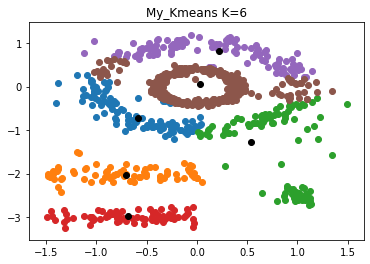

In [84]:
#Plot new clusters and k= 6 Centroids 

plt.scatter(dfK6_0.iloc[:,0],dfK6_0.iloc[:,1])
plt.scatter(dfK6_1.iloc[:,0],dfK6_1.iloc[:,1])
plt.scatter(dfK6_2.iloc[:,0],dfK6_2.iloc[:,1])
plt.scatter(dfK6_3.iloc[:,0],dfK6_3.iloc[:,1])
plt.scatter(dfK6_4.iloc[:,0],dfK6_4.iloc[:,1])
plt.scatter(dfK6_5.iloc[:,0],dfK6_5.iloc[:,1])
#plt.scatter(new_centroidsK6.iloc[:,0],newcentroidsK6.iloc[:,1])
plt.scatter(new_centroidsK6[0][0], new_centroidsK6[0][1], c='black')
plt.scatter(new_centroidsK6[1][0], new_centroidsK6[1][1], c='black')
plt.scatter(new_centroidsK6[2][0], new_centroidsK6[2][1], c='black')
plt.scatter(new_centroidsK6[3][0], new_centroidsK6[3][1], c='black')
plt.scatter(new_centroidsK6[4][0], new_centroidsK6[4][1], c='black')
plt.scatter(new_centroidsK6[5][0], new_centroidsK6[5][1], c='black')
plt.title("My_Kmeans K=6")
plt.show()

1-h. Evalaute your result. (5 pts)

In [84]:
"""
When comparing the box plot made from df and MyKmeans to the boxplot made from dfQ2 one main difference. 
The number of classes in MyKmeans has a total of 3 classes with a mean of class 1, while in dfQ2 there are are 6 classes with a mean of class 2.
As a result the MyKmeans K values is different than that of dfQ2. Additionally, the distributions of of the X and Y features of both datasets seem to be the same.
Now that we know the true K value, the MYKmeans was repruduced using a k value of 6 and produces the above chart.
The higher K value of 6 allows for data points to be seperated based on a higher degree of similiarity.
"""


'\nWhen comparing the box plot made from df and MyKmeans to the boxplot made from dfQ2 one main difference. \nThe number of classes in MyKmeans has a total of 3 classes with a mean of class 1, while in dfQ2 there are are 6 classes with a mean of class 2.\nAs a result the MyKmeans K values is different than that of dfQ2. Additionally, the distributions of of the X and Y features of both datasets seem to be the same,\n  \n'

## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [49]:
heir = AgglomerativeClustering()

In [50]:
#use N = 3 clusters euclidean distance measuremnet and avaerage linkage 
heir.set_params(n_clusters=3, affinity="euclidean", linkage='average')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [51]:
heir.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [52]:
labels1 = heir.labels_

In [53]:
#Second attempt with Now with euclidean distance and ward
heir.set_params(n_clusters = 3, affinity="euclidean", linkage="ward")

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [54]:
heir.fit(df)
labels2=heir.labels_

In [55]:
#Third attempt with euclidean distance and complete linkage 
heir.set_params(n_clusters=3, affinity="euclidean", linkage='complete')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [56]:
heir.fit(df)
labels3= heir.labels_

In [57]:
# Fourth attempt with manhattan distance and complete linkage
heir.set_params(n_clusters=3, affinity='manhattan',linkage='complete')

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [58]:
heir.fit(df)
labels4 = heir.labels_

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

In [85]:
#get true labels
trueLabels = dfQ2['Class']
trueLabels = np.array(trueLabels)
trueLabels

array([1, 6, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 4, 3, 1, 1, 6, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 2, 2, 1, 4, 2,
       2, 2, 2, 1, 3, 5, 3, 2, 5, 2, 2, 5, 1, 1, 3, 3, 2, 2, 3, 2, 1, 2,
       1, 6, 5, 1, 1, 2, 1, 6, 4, 2, 6, 4, 2, 1, 2, 2, 3, 1, 5, 1, 4, 2,
       2, 4, 1, 1, 4, 2, 2, 1, 4, 2, 1, 1, 3, 6, 4, 1, 1, 5, 2, 4, 4, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 6, 1, 3, 2, 4, 5, 1, 1, 1,
       1, 3, 2, 2, 1, 3, 4, 5, 2, 6, 2, 2, 2, 1, 4, 2, 2, 2, 3, 1, 1, 1,
       1, 1, 3, 1, 2, 1, 2, 5, 1, 5, 4, 2, 1, 1, 5, 2, 4, 1, 1, 2, 1, 1,
       1, 2, 2, 3, 2, 1, 2, 2, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4,
       2, 2, 1, 2, 1, 2, 4, 1, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 4, 1, 3, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1,
       3, 2, 2, 6, 1, 5, 2, 6, 1, 1, 1, 2, 4, 4, 2, 1, 5, 1, 2, 1, 2, 2,
       1, 1, 3, 3, 1, 2, 3, 2, 6, 1, 1, 2, 1, 1, 3, 6, 3, 1, 1, 3, 2, 2,
       1, 1, 4, 1, 1, 6, 2, 5, 1, 2, 2, 1, 2, 1, 2,

In [90]:
#compare labels1 - labels4 with true labels
compare1 = np.equal(trueLabels,labels1)


824

In [91]:
#for N = 3 clusters euclidean distance measuremnet and avaerage linkage the correct labels ratio is
ratio1=compare1.sum()/len(compare1)
ratio1

0.38228155339805825

In [93]:
# for the Second attempt with Now with euclidean distance and wardthe correct labels ratio is 
compare2 = np.equal(trueLabels, labels2)
ratio2= compare2.sum()/len(compare2)
ratio2

0.35558252427184467

In [95]:
##The ratio for the third attempt with euclidean distance and complete linkage is
compare3 = np.equal(trueLabels,labels3)
ratio3 = compare3.sum()/len(compare3)
ratio3

0.38228155339805825

In [97]:
#The ratio for the Fourth attempt with manhattan distance and complete linkage is
compare4 = np.equal(trueLabels, labels4)
ratio4 = compare4.sum()/len(labels4)
ratio4

0.35558252427184467

In [98]:
#The First and third attempts where euclidean distance and either the average linkage or complete linkage is used produce the 
#largest raio of 0.3822

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [99]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

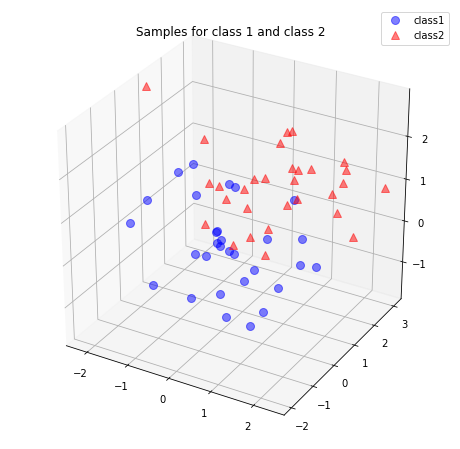

In [100]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

    1. Take the dataset w/o classes. 

In [114]:
all_samples = np.hstack((class1_sample, class2_sample))
assert all_samples.shape == (3,60), "The matrix has not the dimensions 3x60"

    2. Compute the d-dimentional mean vector.

In [116]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


    3. Compute the scatter matrix as following. 
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
    where $\bar{\textbf{x}}$ is the mean vector.

In [133]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    #all_samples is (3,1) mean_vector is(3,1) scatter_matrix should be (3,3)
    scatter_matrix += (all_samples[:,i]-mean_vector).dot((all_samples[:,i] - mean_vector).T)
    
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[217.37768658 216.3796061  212.48755958]
 [216.3796061  215.88906445 213.97618171]
 [212.48755958 213.97618171 219.78111096]]


    Then compute the covariance matrix using `np.cov()` function.

In [127]:
cov_mat = np.cov(all_samples)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.12432002  0.27043376  0.15901633]
 [ 0.27043376  1.23833166 -0.01238244]
 [ 0.15901633 -0.01238244  1.25001409]]


    4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 

In [135]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]
Eigenvalue 1 from scatter matrix: 646.2448522534614
Eigenvalue 1 from covariance matrix: 0.8592333131868222
Scaling factor:  752.1180130418769
------------------------------------------------------------
Eigenvector 2: 
[[-0.6149445 ]
 [ 0.77264151]
 [-0.15769701]]
Eigenvalue 2 from scatter matrix: -4.725892883219026e-14
Eigenvalue 2 from covariance matrix: 1.495600366782271
Scaling factor:  -3.159863415510261e-14
------------------------------------------------------------
Eigenvector 3: 
[[-0.5371312 ]
 [-0.26399196]
 [ 0.80112316]]
Eigenvalue 3 from scatter matrix: 6.803009733643127
Eigenvalue 3 from covariance matrix: 1.2578320969790298
Scaling factor:  5.408519745983669
------------------------------------------------------------


    5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 

In [136]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

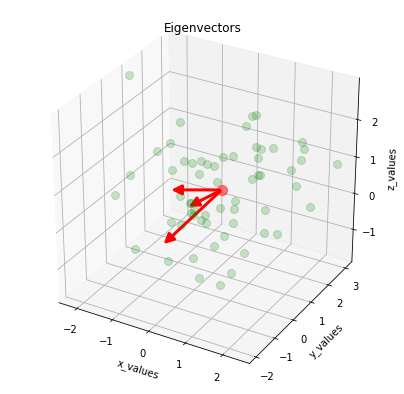

In [137]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

    6. Sort the eigenvectors by descreasing eigenvalues. 

    The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

In [140]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

646.2448522534614
6.803009733643127
4.725892883219026e-14


   7. Choose *k* eigenvectors with the largest eigenvalues.

    We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.

In [179]:
eig_pairs[0][1].shape

(3,)

In [149]:
matrix_w = np.vstack((eig_pairs[0][1], eig_pairs[1][1]))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.57735027 -0.57735027 -0.57735027]
 [-0.5371312  -0.26399196  0.80112316]]


    8. Transform the samples onto the new subspace. 

    The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [176]:
matrix_w.shape

(2, 3)

In [161]:
transformed = matrix_w.dot(all_samples)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

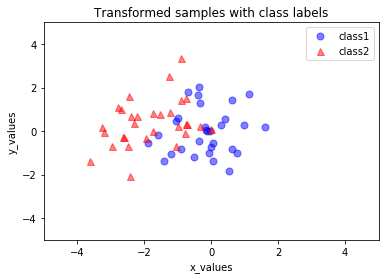

In [162]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA()
pca.set_params(n_components=2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [177]:
pComponents= pca.fit_transform(all_samples)
pComponents

array([[-1.49086251,  5.72736844],
       [-5.30359424, -3.92237362],
       [ 6.79445676, -1.80499482]])

In [174]:
transformed = pComponents.T.dot(all_samples)

In [170]:
pcaDF = pd.DataFrame(data = pComponents, columns=['Principal Component1', 'Principal Component2'])

In [171]:
pcaDF

,Principal Component1,Principal Component2
0,-1.490863,5.727368
1,-5.303594,-3.922374
2,6.794457,-1.804995


In [167]:
#Principal Component1 explaines 59.7 percent of the data and principal component 2 explains 40.2% of the data.
pca.explained_variance_ratio_

array([0.59795804, 0.40204196])

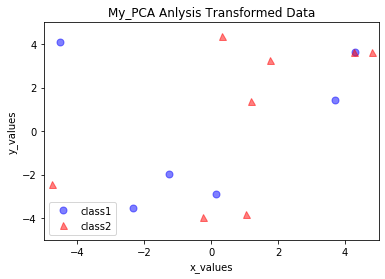

In [182]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('My_PCA Anlysis Transformed Data')

plt.show()

In [ ]:
#When using the SKlean PCA analysis compared to the implementation in part 3-b we get very different results for the visualization
#and thus the eigenvectors and eigenvalues